
<span style="color:cyan; font-size:3em; font-family:Papyrus"> 
<div align="center"><b>Pregunta 2</b></div>
</span> 

## Cargar Datos

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import feather

In [120]:
df = pd.read_feather('./data/DatosViernesNegro.feather')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [121]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [122]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

## 1. Muestre en un diagrama de barras como se distribuye el numero de elementos de la variable Gender.

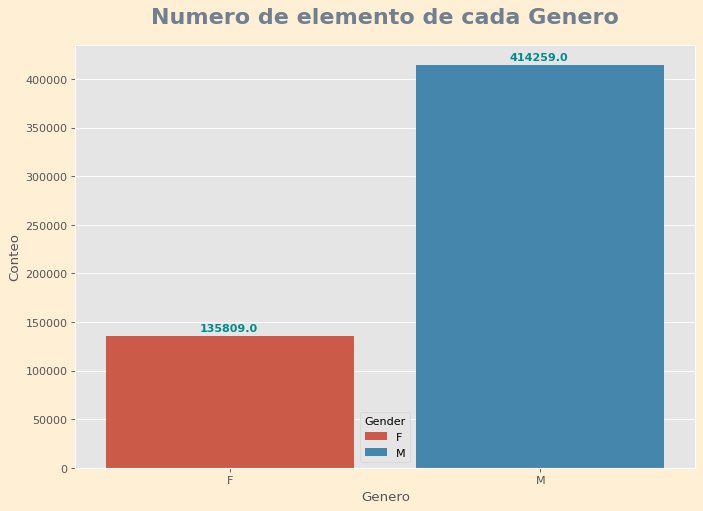

In [123]:
fig = plt.figure(figsize=(10,7), facecolor = 'papayawhip', edgecolor = '#FDEDEC', dpi=80)
plt.style.use('ggplot')
ax = sns.countplot(x = 'Gender', data=df, hue='Gender', dodge=False)
plt.title('Numero de elemento de cada Genero', fontsize=20, color="slategrey", 
fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center")
plt.xlabel('Genero')
plt.ylabel('Conteo')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5000),  
   rotation=0, color='darkcyan', fontweight='bold')
plt.show()

## 2. Considere la siguiente codificación para la variable Age

<center>

|Age |Age_Cod|
| :---        |    ---:   |
|0-17 |Stage1|
|18-25 |Stage2|
|26-35 |Stage3|
|36-45 |Stage4|
|46-50 |Stage5|
|51-55 |Stage6|
|55+ |Stage7|

</center>


Muestre en un diagrama de barras como se distribuye el numero de elementos de la variable Age_Cod






In [124]:
df.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
347461,1005520,P00127242,M,46-50,1,C,0,1,1,16.0,NaN,15587
52464,1001989,P00370142,M,51-55,6,C,1,0,16,NaN,NaN,20959
211492,1002647,P00130842,F,36-45,11,C,1,1,5,14.0,NaN,7016
401711,1001778,P00047242,M,18-25,4,B,1,0,1,5.0,NaN,4229
227118,1005000,P00299542,M,26-35,4,B,4+,0,8,NaN,NaN,10013


In [125]:
df['Age'] = df['Age'].astype('category')
df['Age_cod'] = df['Age']
df['Age_cod'] = df['Age_cod'].map({
        '0-17':'Stage 1', '18-25':'Stage 2', '26-35':'Stage 3', 
        '36-45':'Stage 4', '46-50':'Stage 5', '51-55':'Stage 6', 
        '55+':'Stage 7'
    })
pd.crosstab(index=df['Age_cod'], columns='count')

col_0,count
Age_cod,
Stage 1,15102
Stage 2,99660
Stage 3,219587
Stage 4,110013
Stage 5,45701
Stage 6,38501
Stage 7,21504


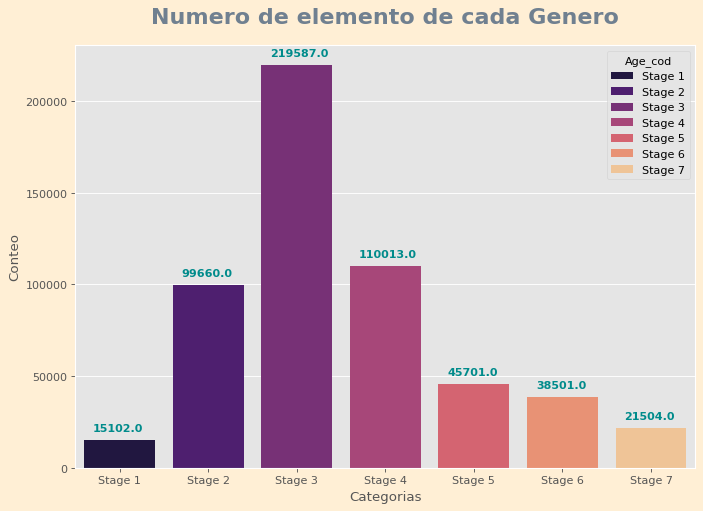

In [126]:
fig = plt.figure(figsize=(10,7), facecolor = 'papayawhip', edgecolor = '#FDEDEC', dpi=80)
plt.style.use('ggplot')
ax = sns.countplot(x='Age_cod', data=df, hue='Age_cod', dodge=False, palette='magma')
plt.title('Numero de elemento de cada Genero', fontsize=20, color="slategrey", 
fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center")
plt.xlabel('Categorias')
plt.ylabel('Conteo')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5000),  
   rotation=0, color='darkcyan', fontweight='bold')
plt.show()

## 3. Elimine las variables con mas de 2022 valores faltantes.

In [127]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
Age_cod                            0
dtype: int64

In [128]:
# Porcentaje de valores faltantes
round(df.isnull().sum()/df.shape[0]*100,2)

User_ID                        0.00
Product_ID                     0.00
Gender                         0.00
Age                            0.00
Occupation                     0.00
City_Category                  0.00
Stay_In_Current_City_Years     0.00
Marital_Status                 0.00
Product_Category_1             0.00
Product_Category_2            31.57
Product_Category_3            69.67
Purchase                       0.00
Age_cod                        0.00
dtype: float64

In [129]:
df.drop(['Product_Category_2','Product_Category_3'], axis=1, inplace=True)
df.sample(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Age_cod
310377,1005831,P00120442,M,26-35,1,A,2,1,8,8040,Stage 3
176909,1003399,P00070542,M,26-35,4,C,1,0,3,13540,Stage 3
167855,1001899,P00110742,F,46-50,6,A,1,1,1,15887,Stage 5


## 4.Elimine las variables User_ID y Product_ID

In [130]:
df.drop(['User_ID','Product_ID'], axis=1, inplace=True)
df.sample(3)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Age_cod
363034,M,46-50,7,B,3,1,6,12590,Stage 5
121628,M,26-35,16,B,1,0,5,6978,Stage 3
111736,M,36-45,0,B,1,0,1,19614,Stage 4


## 5. Muestre un histograma de la variable Purchase separando los datos por sexo (Variable Gender) 

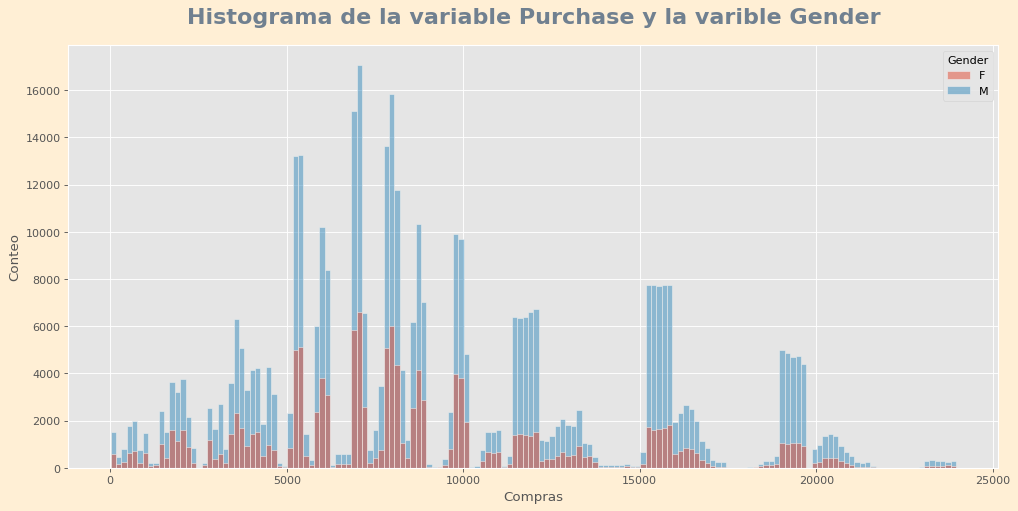

In [131]:
fig = plt.figure(figsize=(15,7), facecolor = 'papayawhip', edgecolor = '#FDEDEC', dpi=80)
plt.style.use('ggplot')
sns.histplot(x='Purchase', data=df, hue='Gender')
plt.title('Histograma de la variable Purchase y la varible Gender', fontsize=20, color="slategrey", 
fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center")
plt.xlabel('Compras')
plt.ylabel('Conteo')
plt.show()

In [132]:
# df['Purchase'].apply(
#     pd.Series.value_counts, 
#     bins=[12, 4012, 8012, 12012, 16012, 20012]
# ).sum()

In [133]:
hist, bins_edges = np.histogram(df['Purchase'])

In [134]:
pd.crosstab(df['Purchase'], df['Gender'])

Gender,F,M
Purchase,,
12,27,74
13,25,81
14,30,65
24,28,90
25,30,83
...,...,...
23956,0,1
23958,0,4
23959,1,1


## 6. Muestre un histograma de la variable Purchase separando los datos por la variable Age_Cod

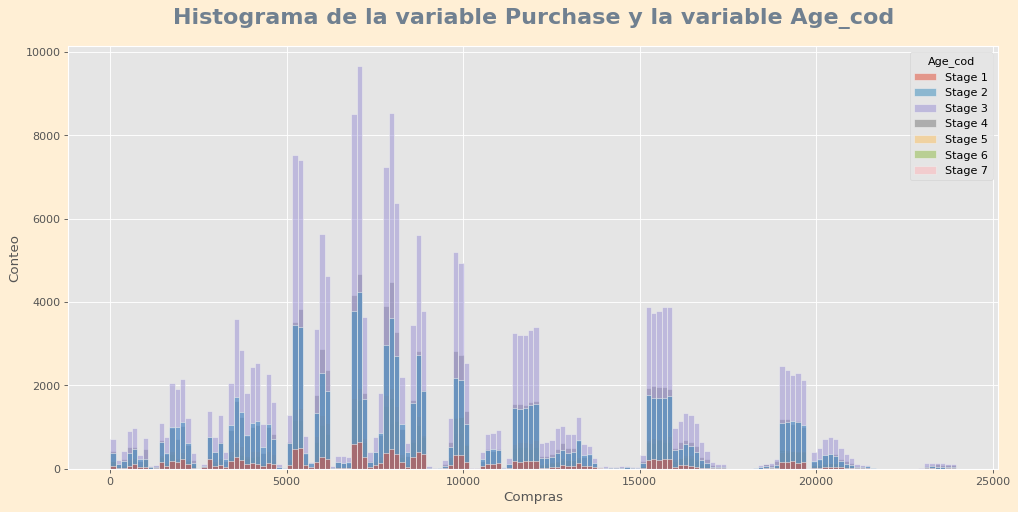

In [135]:
fig = plt.figure(figsize=(15,7), facecolor = 'papayawhip', edgecolor = '#FDEDEC', dpi=80)
plt.style.use('ggplot')
sns.histplot(x='Purchase', data=df, hue='Age_cod')
plt.title('Histograma de la variable Purchase y la variable Age_cod', fontsize=20, color="slategrey", 
fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center")
plt.xlabel('Compras')
plt.ylabel('Conteo')
plt.show()

In [136]:
df.groupby(['Gender','Age','Age_cod'])[['Purchase']].sum()

Purchase
Gender Age  Age_cod           
F      0-17 Stage 1   42385978
            Stage 2          0
            Stage 3          0
            Stage 4          0
            Stage 5          0
...                        ...
M      55+  Stage 3          0
            Stage 4          0
            Stage 5          0
            Stage 6          0
            Stage 7  154984610

[98 rows x 1 columns]

## 7. Cree un modelo de clasificacion (diferente a una regresión logistica) considerando que la variable de interés es el Sexo (Variable : Gender).

In [137]:
# df.head(3)
# from sklearn.preprocessing import LabelEncoder
# lr = LabelEncoder()
# df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])
# df['Gender'] = lr.fit_transform(df['Gender'])
# df['Age'] = lr.fit_transform(df['Age'])
# df['City_Category'] = lr.fit_transform(df['City_Category'])


In [138]:
df = pd.get_dummies(data=df, columns=['Age', 'City_Category', 'Stay_In_Current_City_Years'])

In [139]:
from sklearn.model_selection import train_test_split
X = df.drop(['Gender','Age_cod'],axis=1)
y = df['Gender']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,
    train_size=0.7,
    random_state=2022
    )

In [140]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    random_state = 2022)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=2022)

In [141]:
y_pred = model.predict(X_test)

In [143]:
print(" Classifier\n",np.array(y_pred == y_test)[:])

 Classifier
 [ True False  True ...  True False  True]


In [150]:
print('Percentage : ', round(100*np.sum(y_pred == y_test)/len(y_test),2), '%')

Percentage :  76.28 %


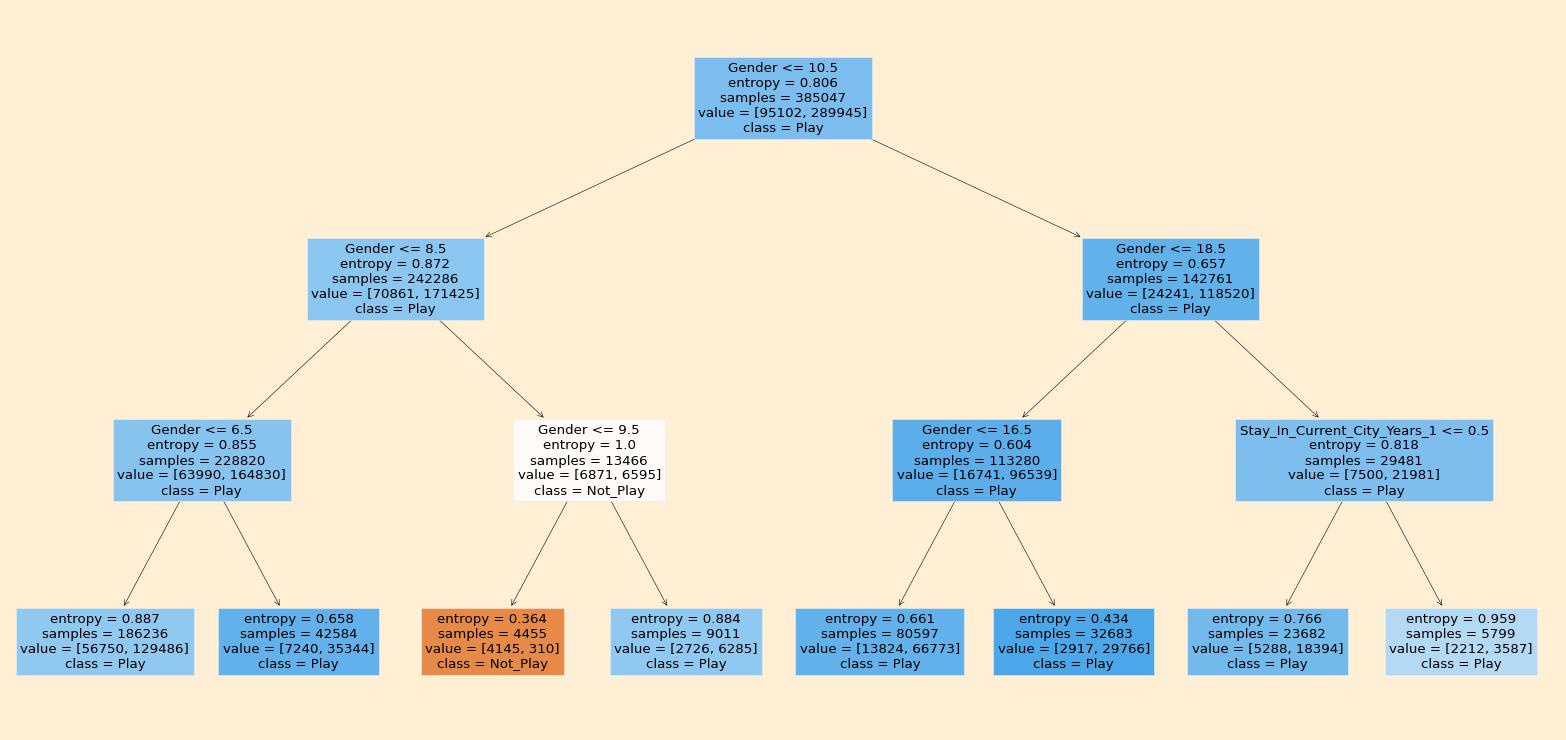

In [148]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,12), facecolor = 'papayawhip', edgecolor = '#FDEDEC', dpi=80)
plt.style.use('ggplot')
plot_tree(
    model, 
    feature_names=df.columns, 
    fontsize=12, 
    filled=True, 
    class_names=['Not_Play', 'Play']
    )
plt.show()

In [93]:
y_pred_df = pd.DataFrame(y_pred, columns=['y_pred'])

with pd.ExcelWriter('./result/decision_tree_classifier.xlsx') as writer:  
    X_train[:20].to_excel(writer, sheet_name='X_train')
    X_test[:20].to_excel(writer, sheet_name='X_test')
    y_train[:20].to_excel(writer, sheet_name='y_train')
    y_test[:20].to_excel(writer, sheet_name='y_test')
    y_pred_df[:20].to_excel(writer, sheet_name='y_pred')

## 8. Cree un RandomForestRegressor  (haciendo un proceso de GridSearchCV) considerando como variable dependiente a Purchase.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# create a regressor object 
RFregressor = RandomForestRegressor(random_state = 0)  

In [ ]:
RFregressor.fit(X_train, y_train)

In [ ]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, rf_y_pred)))

## 9. Cree un dataset de nombre VN_Cities_A_C donde solo se considere las ciudades A y C (Variable City_Category). Para este nuevo dataset cree un modelo de regresión logística (haciendo un proceso de GridSearchCV) considerando a la variable City_Category como la variable de interes.


## 10. Implemente una red neuronal de clasificacion para pronosticar la variable Gender. Realice los cinco primeros pasos descritos en la sesion 12. Es decir : 

1. 1er Paso : Cargar datos 
2. 2do Paso : Definir un modelo en keras
3. 3er Paso : "Compilamos" el modelo del paso 2
4. 4to Paso : Ajustar el modelo a nuestro conjunto de datos (proviene del paso 1)
5. 5to Paso : Evaluación del modelo